# Data Analyse


## Import CSV et pipline

Etapes :

- Import du CSV préparé.
- Supression du labels Y.
- A l'aide de la pipline nous supprimons les attributs de types string à l'aide d'un encodeur incrementale sur les champs :
    - MaritalStatus
    - JobRole
    - BusinessTravel
    - Department
    - EducationField
    - Male /female
- Visualisation de la matrice des données.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

DATA_MERGE_PATH = os.path.join("data")
def DataMerge(data_merge_path=DATA_MERGE_PATH):
    csv_path = os.path.join(data_merge_path, "DataMerge.csv")
    return pd.read_csv(csv_path) 

X = DataMerge()

X_labels = X["Attrition"].copy()
X = X.drop("Attrition", axis=1)

#remplace gender male=1 / female=0
X.Gender.replace(to_replace=dict(Male=1, Female=0), inplace=True)
 
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
 
X_num = X.select_dtypes(include=[np.number])
 
num_attribs = list(X_num)
cat_attribs = ["MaritalStatus", "JobRole", "BusinessTravel", "Department", "EducationField"]
 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OrdinalEncoder(), cat_attribs),
    ])
 
X_prepared = full_pipeline.fit_transform(X)

#Visualisation
pd.set_option('display.max_columns', None)
X_prepared

array([[-1.73800917,  0.25240281,  1.15735878, ...,  2.        ,
         2.        ,  1.        ],
       [-1.73722299,  0.25240281, -0.65794042, ...,  1.        ,
         1.        ,  1.        ],
       [-1.73643681, -0.66194603, -0.65794042, ...,  1.        ,
         1.        ,  4.        ],
       ...,
       [ 1.72590965,  1.16675164,  1.15735878, ...,  2.        ,
         1.        ,  3.        ],
       [ 1.72669583, -1.57629486,  0.24970918, ...,  2.        ,
         1.        ,  1.        ],
       [ 1.72748201,  1.16675164, -1.56559001, ...,  2.        ,
         2.        ,  3.        ]])

## Visualisation des champs

>**Cette visualisation du CSV nous permet la visualisation de nos champs contenus dans notre fichier csv (et non la pipline, d'ou la présence de chaînes de caractères).**

>**Nous allons chercher à étudier ces champs de façon à emmettre des hypothèses sur leurs corélation avec le départ ou non du salarié.**

In [2]:
X.head()

,Unnamed: 0,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
0,0,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,6,2,...,11,0,1.0,6,1,0,0,3,3,25562.179418
1,1,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,10,1,...,23,1,6.0,3,5,1,4,2,4,27729.614998
2,2,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,17,4,...,15,3,5.0,2,5,0,3,3,3,24697.310764
3,3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,2,5,...,11,3,13.0,5,8,7,5,2,3,25293.129259
4,4,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,10,1,...,12,2,9.0,2,6,0,4,3,3,27940.867653


## Table visualisation Info et histogramme

Les histogrammes nous permettent de visualiser les données contenus dans nos champs et de voir leurs répartitions,
nous allons étudier les valeurs et leurs répartitions.

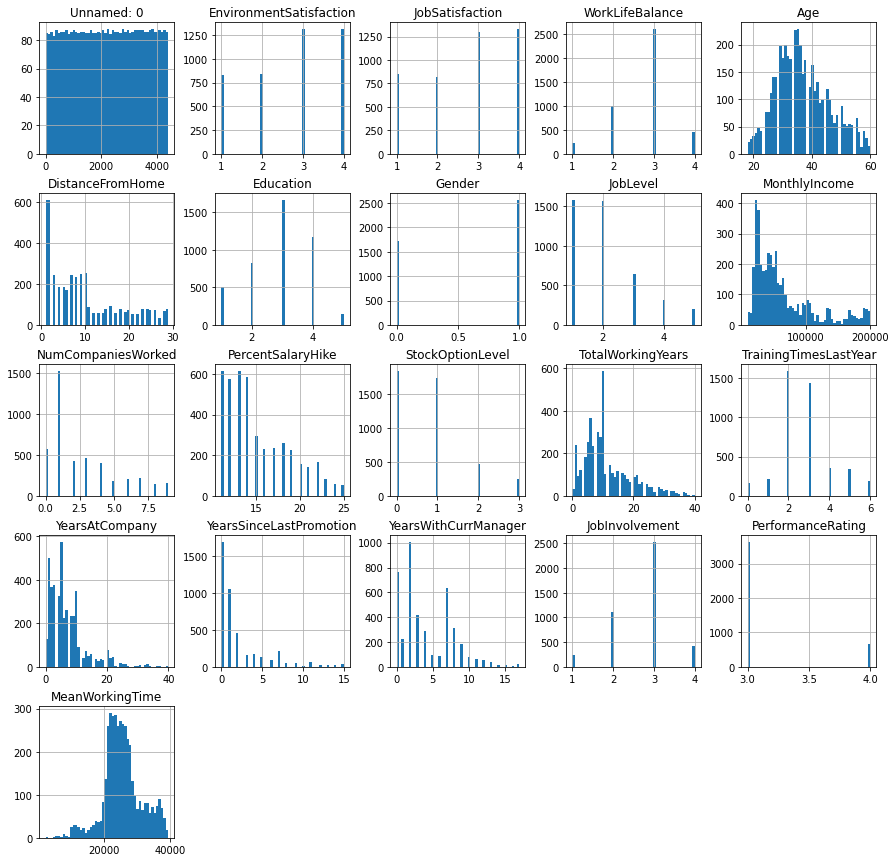

In [3]:
#graph hist
X.hist(bins=50, figsize=(15,15))
plt.show()

#### Etude du champ "Age"

- Nous constatons que l'age moyen est de 36 ans (assez jeune).
- L'age minimal est de 18 ans et le max de 60 ans.
- Avec un écart type de 9, l'écart des ages est assez élévé (mélange d'age).
- En examinant les quartile nous voyons que le panel d'age est compris entre 30 et 43 ans

In [23]:
X["Age"].describe()

count    4300.000000
mean       36.926977
std         9.146517
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

#### Etude du champ "MonthlyIncome"
- La moyenne des salaire est de  65059.844186€/an.
- L'écart type nous montre qu'il y a un grand écart entre les petits et grands salaires.
- Nous constatons des extremes importants.

In [6]:
X["MonthlyIncome"].describe()

count      4300.000000
mean      65059.844186
std       47045.398914
min       10090.000000
25%       29260.000000
50%       49360.000000
75%       83802.500000
max      199990.000000
Name: MonthlyIncome, dtype: float64

#### Etude du champ "WorkLifeBalance"
- Dans l'ensemble les employées ont un bon équilibre entre leurs vie/travail.

In [38]:
X["WorkLifeBalance"].describe()

count    4300.000000
mean        2.761163
std         0.707800
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

#### Etude du champ "JobSatisfaction"
- Les employées sont majoritairement satisfait de leurs emplois.

In [45]:
X["JobSatisfaction"].describe()

count    4300.000000
mean        2.724884
std         1.101875
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

#### Etude du champ "EnvironmentSatisfaction"
- Leurs environnement de travail est egalement majortairement satisfaisant pour les salariés.

In [47]:
X["EnvironmentSatisfaction"].describe()

count    4300.000000
mean        2.723953
std         1.093802
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

#### Etude du champ "YearsAtCompany"

- Le nombre d'années passé dans l'entreprise reste faible (7 ans en moyenne).
- l'étendu des valeurs est très grande (de 0 à 40ans).
- Cette variable semble interessante.

In [48]:
X["YearsAtCompany"].describe()

count    4300.000000
mean        7.026047
std         6.148036
min         0.000000
25%         3.000000
50%         5.000000
75%         9.250000
max        40.000000
Name: YearsAtCompany, dtype: float64

## Dendogramme

Le dendogramme nous permet la visualisation des regroupements hierarchique dans notre jeu de données.
Nous pouvons constater la présence de deux classes majoritaires.

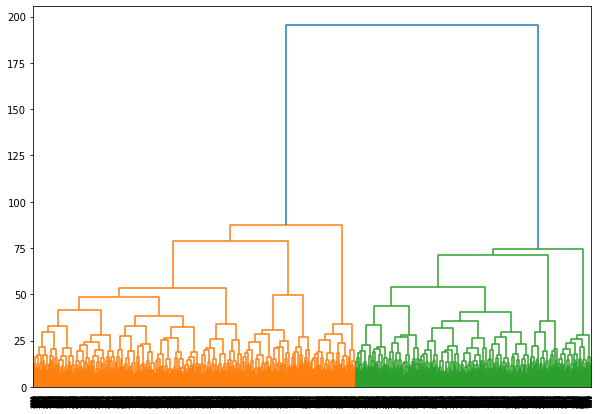

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure( figsize=(10, 7))

dendrogram(linkage(X_prepared, method='ward'), orientation='top', distance_sort='descending', leaf_rotation=90., leaf_font_size=5.)
plt.show()


## Hypothèse sur le jeu de données

A la suite de cette petite étude sur nos jeux de données, plusieurs hypothèse en ressorte :

- Les facteurs que nous supposons pouvant influer sur le modèle sont :
    - "JobSatisfaction"
    - "JobEnvironnement"
    - "WorklifeBalance"
    - Dans l'ensemble des paramètre qui joue sur le bien être des employés.

- Les données des enquêtes de satisfaction ne sont pas pertinentes (Un ensemble de bonne note en moyenne).

- Les 2 paramètres ayant le plus d'influence sont l'age et "MonthlyIncome" (Avis non objectif).